In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimage

from skimage.data import coins
coins = coins()

In [10]:
coins.shape

(303, 384)

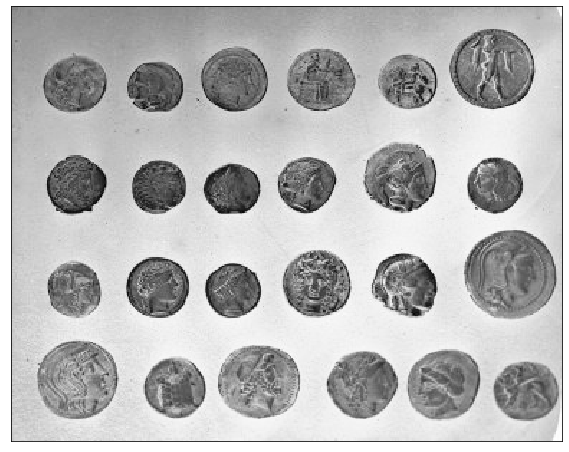

In [11]:
plt.figure(figsize=(10,8))

plt.imshow(coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [14]:
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale

In [15]:
smoothened_coins = gaussian_filter(coins, sigma=2)

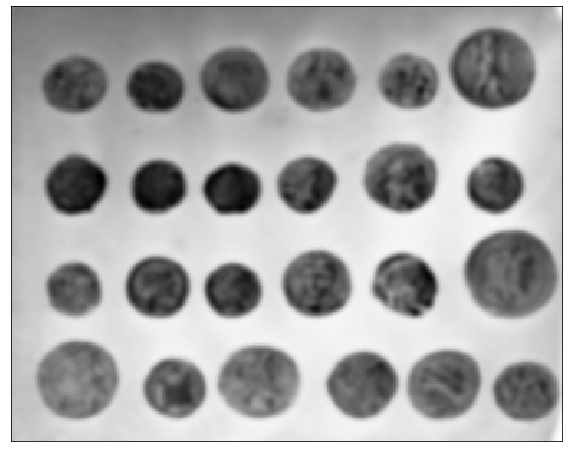

In [16]:
plt.figure(figsize=(10,8))

plt.imshow(smoothened_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [28]:
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect",
                         anti_aliasing=True, multichannel=False)

In [29]:
rescaled_coins.shape

(61, 77)

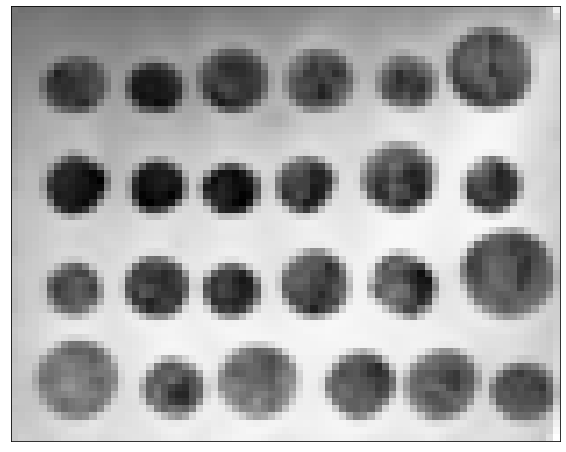

In [30]:
plt.figure(figsize=(10,8))

plt.imshow(rescaled_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
n_clusters = 10

In [31]:
X = np.reshape(rescaled_coins, (-1,1))

X.shape

(4697, 1)

In [32]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=10)

In [25]:
ac.labels_

array([5, 5, 5, ..., 0, 0, 7])

In [33]:
labels= np.reshape(ac.labels_, rescaled_coins.shape)

labels.shape

(61, 77)

In [34]:
unique_labels = np.unique(labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

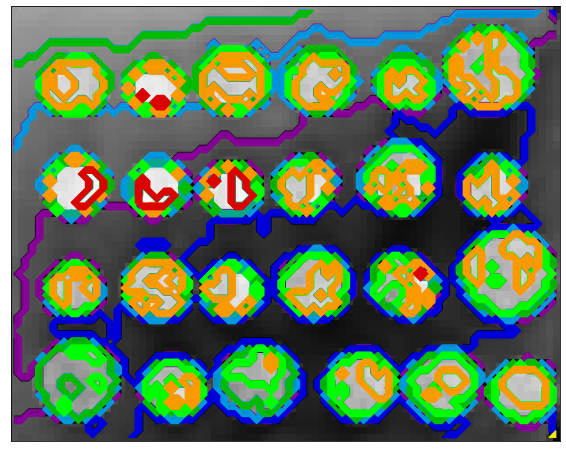

In [39]:
plt.figure(figsize=(10,8))

plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels ==l, colors=[plt.cm.nipy_spectral(l/ float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()

In [41]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescaled_coins.shape)

connectivity.shape

(4697, 4697)

In [42]:
n_clusters = 27

In [43]:
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)

ward.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=27)

In [44]:
ward.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [45]:
labels= np.reshape(ward.labels_, rescaled_coins.shape)

labels.shape

(61, 77)

In [46]:
unique_labels = np.unique(labels)

print("Number of clusters:", unique_labels)

Number of clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


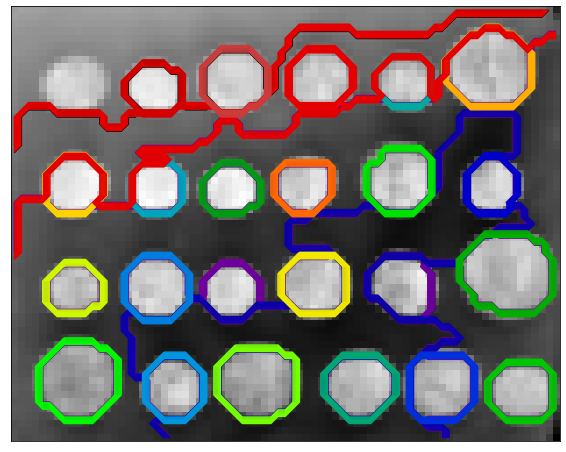

In [47]:
plt.figure(figsize=(10,8))

plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels ==l, colors=[plt.cm.nipy_spectral(l/ float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()